In [1]:
.libPaths(c("/home/jpm73279/.conda/envs/R_final_install/lib/R/library", .libPaths()))
library(devtools)
library(tidyverse)
library(bedtoolsr)
library(ggrepel)
library(patchwork)

Warning message:
“package ‘devtools’ was built under R version 4.3.1”
Loading required package: usethis

── Attaching core tidyverse packages ─────────────────── tidyverse 2.0.0.9000 ──
✔ dplyr     1.1.1          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.1          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in fun(libname, pkgname):
“bedtoolsr was built with bedtools version 2.30.0 but you have version 2.31.0 installed. Function syntax may have changed and wrapper will not function correctly. To fix this, please install bedtools version 2.30.0 and either add it to your PATH or run:
options(bedtools.path = \"[bed

# Quantify the number of ACRs which are close within 1/2 genes which are CTS NOT using cicero

In [2]:
# Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

# Define a function to read the data and add columns
read_and_annotate_closests <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE,col_types = "ccccccccccdd") %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}
# Define a function to read the data and add columns
read_and_annotate <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE) %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

In [3]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = tolower(species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(species, name, type)

Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [4]:
# Define the files and conditions to be processed
#Old set not based off of updated Bs/Procambium CTS ACR allowanges
# files_conditions <- list(
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "zm")
# )





files_conditions <- list(
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "os"),  
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "pm"),  
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "sb"),  
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "uf"), 
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "zm")  
)




# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$cell_type, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

In [5]:
combined_acrs_species %>% 
    dplyr::filter(species == "os")

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr5,19715367,19739905,LOC_Os05g33570,Os__PPDK_1,Chr5,19728128,19728629,scACR_42532;bundle_sheath,0,bundle_sheath,os
Chr7,20762801,20780831,LOC_Os07g34640,Os__PPDKRP_1,Chr7,20764358,20764859,scACR_52889;bundle_sheath,3.571301024963394e-5,bundle_sheath,os
Chr1,5898224,5911502,LOC_Os01g11054,Os__PEPC_1,Chr1,5899326,5899827,scACR_1352;mesophyll,0,mesophyll,os
Chr1,25690806,25722854,LOC_Os01g45274,Os__CA_1,Chr1,25692332,25692833,scACR_4585;mesophyll,0,mesophyll,os
Chr1,25690806,25722854,LOC_Os01g45274,Os__CA_1,Chr1,25696012,25696513,scACR_4586;mesophyll,0,mesophyll,os
Chr1,25690806,25722854,LOC_Os01g45274,Os__CA_1,Chr1,25704169,25704670,scACR_4591;mesophyll,0,mesophyll,os
Chr11,13932835,13947624,LOC_Os11g24450,Os__DIC_1,Chr11,13937774,13938275,scACR_14085;mesophyll,0,mesophyll,os
Chr11,13932835,13947624,LOC_Os11g25030,Os__DIC_2,Chr11,13937774,13938275,scACR_14085;mesophyll,0,mesophyll,os
Chr12,10080093,10085348,LOC_Os12g17600,Os__RBCS_2,Chr12,10079598,10080099,scACR_17501;mesophyll,0,mesophyll,os


In [6]:
# closest_files <- list(
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_ms_acrs_closest.bed", cell_type = "mesophyll", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_ms_acrs_closest.bed", cell_type = "mesophyll", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_ms_acrs_closest.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_ms_acrs_closest.bed", cell_type = "mesophyll", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_ms_acrs_closest.bed", cell_type = "mesophyll", species = "zm")
# )

closest_files <- list(
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes_broad.closest.bed", cell_type = "broad", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes_broad.closest.bed", cell_type = "broad", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes_broad.closest.bed", cell_type = "broad", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes_broad.closest.bed", cell_type = "broad", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes_broad.closest.bed", cell_type = "broad", species = "zm")

)

# Read and annotate each file and store results in a list
closest_acr_lsit <- lapply(closest_files, function(condition) {
  read_and_annotate_closests(condition$path, condition$cell_type, condition$species)
})

# Combine results
closest_acrs_to_species <- bind_rows(closest_acr_lsit) %>% 
    dplyr::filter(X10 %in% combined_acrs_species$X9)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [7]:
head(closest_acrs_to_species)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Chr5,19718505,19737857,LOC_Os05g33570,Os__PPDK_1,mesophyll,Chr5,19728128,19728629,scACR_42532;bundle_sheath,0.000000e+00,0,bundle_sheath,os
Chr7,20764651,20769585,LOC_Os07g34640,Os__PPDKRP_1,mesophyll,Chr7,20764358,20764859,scACR_52889;bundle_sheath,3.571301e-05,0,bundle_sheath,os
Chr9,878144,890186,LOC_Os09g02214,Os__NHD_1,mesophyll,Chr9,650854,651355,scACR_59402;bundle_sheath,0.000000e+00,226790,bundle_sheath,os
Chr1,5899554,5909595,LOC_Os01g11054,Os__PEPC_1,mesophyll,Chr1,5899326,5899827,scACR_1352;mesophyll,0.000000e+00,0,mesophyll,os
Chr1,25692716,25705090,LOC_Os01g45274,Os__CA_1,mesophyll,Chr1,25692332,25692833,scACR_4585;mesophyll,0.000000e+00,0,mesophyll,os
Chr1,25692716,25705090,LOC_Os01g45274,Os__CA_1,mesophyll,Chr1,25696012,25696513,scACR_4586;mesophyll,0.000000e+00,0,mesophyll,os


In [8]:
closest_acrs_to_species %>% 
    dplyr::filter(species == "zm") %>% 
    dplyr::filter(X5 == "Zm__RBCS_2")

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,147004111,147004612,scACR_16177;mesophyll,0.003685709,36171,mesophyll,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,147012172,147012673,scACR_16178;broadly_accessible,NA,28110,broad,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,146945568,146946069,scACR_16176;broadly_accessible,NA,94714,broad,zm


In [9]:
#glimpse(closest_acrs_to_species)

closest_acrs_filtered <- closest_acrs_to_species %>% 
    dplyr::select(X5,X10,X12) %>% 
    dplyr::rename("distance" = X12)


combined_C4_genes_acr_intersections_distance <- left_join(combined_acrs_species, closest_acrs_filtered, by = c("X5", "X9" = "X10")) %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5)





In [10]:
zm_genes_keeping <- c(
  'PEPCK', 'RBCA1', 'RBCA2', 'RUBISCO_activase1', 'RUBISCO_activase2', 'DIC', 
  'PPT', 'PPDK', 'CA2', 'CA3', 'CA1', 'PEPC1', "NADP_ME1", "NADP_MDH", "DIT2", "DIT1"
)

sb_genes_keeping <- c(
  'PEPCK', 'RBCA2__RBCA1', 'RUBISCO_activase1', 'DIC', 'PPT', 'PPDK',
  'CA6_ortho_count_1', 'CA6_ortho_count_2', 'CA1', 'PEPC1', "NADP_ME1_ortho_count_2", 
  "NADP_ME1_ortho_count_1", "NADP_MDH_ortho_count_1", "NADP_MDH_ortho_count_2"
)

pm_genes_keeping <- c(
  'PEP-CK_1', 'PEP-CK_2', 'PEP-CK_3', 'RBCA2_ortho_count_1__RBCA1_ortho_count_1', 
  'RBCA2_ortho_count_3__RBCA1_ortho_count_3', 'RBCA2_ortho_count_4__RBCA1_ortho_count_4', 
  'RBCA2_ortho_count_5__RBCA1_ortho_count_5', 'RBCA2_ortho_count_6__RBCA1_ortho_count_6', 
  'RUBISCO_activase1_ortho_count_1', 'DIC1_', 'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPDK_1', 
  'PPDK_2', 'CA6_ortho_count_1', 'CA6_ortho_count_2', 'CA_2', 'PEPC_1', 'PEPC_2', "NAD-ME_1", 
  "NAD-ME_2", "AspAT_1", "AspAT_2"
)

uf_genes_keeping <- c(
  "PEPCK", "RBCA2_ortho_count_1__RBCA1_ortho_count_1", "RBCA2_ortho_count_2__RBCA1_ortho_count_2", 
  "RBCA2_ortho_count_3__RBCA1_ortho_count_3", "RUBISCO_activase1", "DIC", "PPT", "PPDK", "CA4", 
  "CA6", "PEPC1_ortho_count_1", "PEPC1_ortho_count_2", "NAD-ME_1_ortho_count_1__NAD-ME_2_ortho_count_1", 
  "NAD-ME_1_ortho_count_2__NAD-ME_2_ortho_count_2", "NAD-ME_1_ortho_count_3__NAD-ME_2_ortho_count_3"
)

os_genes_keeping <- c(
  'PEPCK', 'RBCA2_ortho_count_1__RBCA1_ortho_count_1', 'RBCA2_ortho_count_2__RBCA1_ortho_count_2', 
  'RBCA2_ortho_count_3__RBCA1_ortho_count_3', 'RUBISCO_activase1', 'DIC1__ortho_count_2', 'PPDK_1', 
  'CA_1__CA_2', 'PEPC', "PEP-CK_3", "NAD-ME_1__NAD-ME_2", "NAD-MDH12"
)



 combined_C4_genes_acr_intersections_distance.filtered <- combined_C4_genes_acr_intersections_distance# %>% 
#    filter(
#     case_when(
#         species == "zm" & name %in% zm_genes_keeping ~ TRUE,
#         species == "sb" & name %in% sb_genes_keeping ~ TRUE,
#         species == "pm" & name %in% pm_genes_keeping ~ TRUE,
#         species == "uf" & name %in% uf_genes_keeping ~ TRUE,
#         species == "os" & name %in% os_genes_keeping ~ TRUE,
#         TRUE ~ FALSE)) %>% 
#         mutate(name = str_replace_all(name, "_ortho_count_", "_")) %>% 
#     dplyr::mutate(type = case_when(species == "os" & type == "bundle_sheath" ~ "mesophyll", 
#                                   TRUE ~ type))


In [11]:
graphing_matrix_c4_genes <- combined_C4_genes_acr_intersections_distance.filtered %>% 
    ungroup() %>% 
   # dplyr::mutate(up_down_val = case_when(
        #type == cts_acts ~ 1,
        #type != cts_acts ~ -1
   # )) %>% 
    group_by(species, name, cts_acts, type) %>% 
    summarise(n_acrs = n(),
              #n_ctsacrs_same_type = sum(up_down_val),
             mean_distance = mean(distance, na.rm = TRUE),
             )

`summarise()` has grouped output by 'species', 'name', 'cts_acts'. You can
override using the `.groups` argument.


In [12]:
colnames(c4_gene_summary)

ERROR: Error in is.data.frame(x): object 'c4_gene_summary' not found


In [13]:
 c4_gene_summary <- graphing_matrix_c4_genes %>% 
    tidyr::separate(name, into = c("species2", "gene_name"), sep = "__") %>% 
    tidyr::separate(gene_name, into = c("gene_family", "gene_number"), sep = "_") %>% 
    arrange(graphing_matrix_c4_genes, gene_family) 

c4_gene_summary %>% 
    dplyr::filter(gene_family == "PEPC")


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [148].”


species,species2,gene_family,gene_number,cts_acts,type,n_acrs,mean_distance
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
os,Os,PEPC,1,broad,mesophyll,2,745.00000
os,Os,PEPC,1,mesophyll,mesophyll,1,0.00000
pm,Pm,PEPC,1,broad,mesophyll,1,17997.00000
pm,Pm,PEPC,1,mesophyll,mesophyll,4,1541.50000
pm,Pm,PEPC,2,broad,mesophyll,1,0.00000
pm,Pm,PEPC,2,mesophyll,mesophyll,3,2056.00000
sb,Sb,PEPC,1,broad,mesophyll,2,2406.00000
sb,Sb,PEPC,1,mesophyll,mesophyll,5,319.60000
uf,Uf,PEPC,1,broad,mesophyll,1,3.00000


In [14]:
c4_gene_summary %>% 
    dplyr::filter(species == "zm")

species,species2,gene_family,gene_number,cts_acts,type,n_acrs,mean_distance
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
zm,ZM,AlaAT,1,broad,mesophyll,2,325.00000
zm,ZM,AlaAT,2,broad,mesophyll,5,12966.60000
zm,ZM,AlaAT,2,mesophyll,mesophyll,1,54967.00000
zm,ZM,AlaAT,3,broad,mesophyll,2,0.00000
zm,ZM,AlaAT,4,broad,"mesophyll,bundle_sheath",3,2978.66667
zm,ZM,AlaAT,4,bundle_sheath,"mesophyll,bundle_sheath",1,1263.00000
zm,ZM,AlaAT,5,broad,"mesophyll,bundle_sheath",1,0.00000
zm,ZM,AlaAT,6,bundle_sheath,bundle_sheath,2,0.00000
zm,ZM,AlaAT,7,broad,"mesophyll,bundle_sheath",1,0.00000


In [15]:
c4_gene_summary %>%  
    dplyr::family
    dplyr::group_by(species, family) %>% 
    summarise(mean_acrs = mean(mean_distance))


ERROR: Error in `::`(., dplyr, family): 3 arguments passed to '::' which requires 2


In [16]:
options(ggrepel.max.overlaps = 15)


graphing_matrix_c4_genes$species <- factor(graphing_matrix_c4_genes$species, levels = c("sb", "zm", "pm", "uf", "os"))
updated_names <- graphing_matrix_c4_genes %>% 
    tidyr::separate(name, into = c("remaining", "name"), sep = "__") %>% 
    dplyr::filter(is.na(type) != TRUE) %>% 
    dplyr::filter(type %in% c("mesophyll", "bundle_sheath"))


n_acrs_dotplot <- ggplot(updated_names, aes(y = n_acrs, x = type, color = cts_acts,label = name)) +
      geom_dotplot(binaxis='y', stackdir='center', dotsize=.5) +
    geom_text_repel(force = .8,
                   box.padding = 0.5) + 
    theme_bw() +
    facet_grid(cts_acts ~ species) +   
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.background = element_rect(fill = "white")) +
    scale_color_manual(values = c("mesophyll" = "#CC3333", "bundle_sheath" = "#33669A")) +
    scale_y_continuous(breaks=seq(1,7,1))



log_trans <- updated_names %>% 
    dplyr::mutate(log_mean_dist = log(mean_distance + 1)) %>% 
    dplyr::mutate(log_mean_dist = case_when(is.na(log_mean_dist) == TRUE ~ 1,
                                            is.infinite(log_mean_dist) == TRUE ~ 1,
                                            TRUE ~ log_mean_dist))


distance_dotplot <-  ggplot(log_trans, aes(y = log_mean_dist,  
                                               color = cts_acts, x = type, label = name)) +
      geom_dotplot(binaxis='y', stackdir='center', dotsize=.5)+
      geom_text_repel(force = .8,
                     box.padding = 0.5) + 
    theme_bw() +
    facet_grid(cts_acts ~ species) +   
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.background = element_rect(fill = "white")) +
    scale_color_manual(values = c("mesophyll" = "#CC3333", "bundle_sheath" = "#33669A"))


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics we

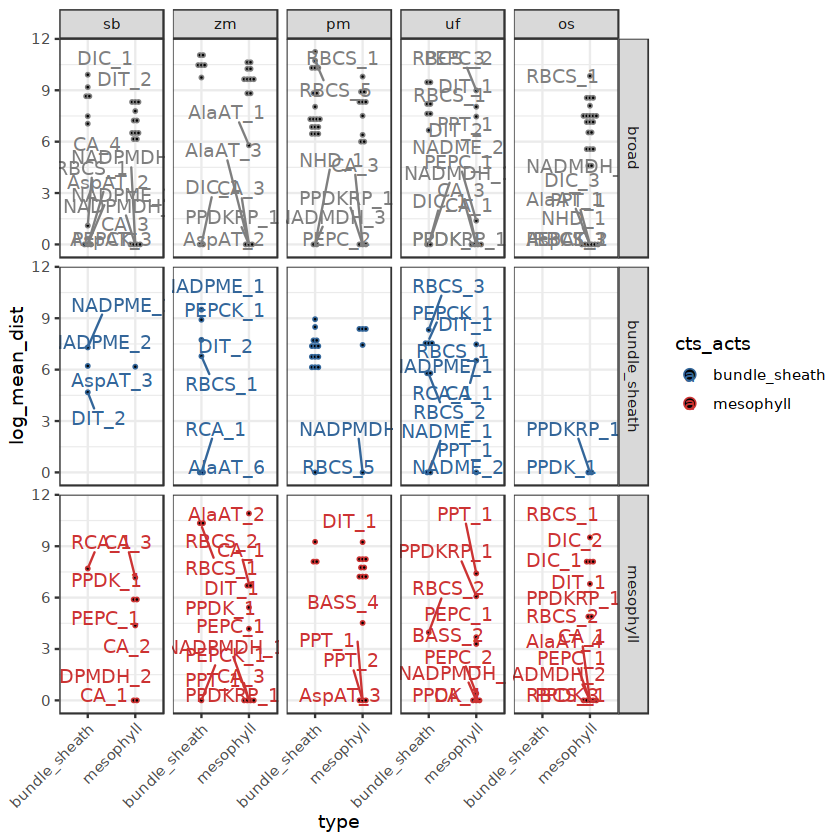

In [17]:
distance_dotplot

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics we

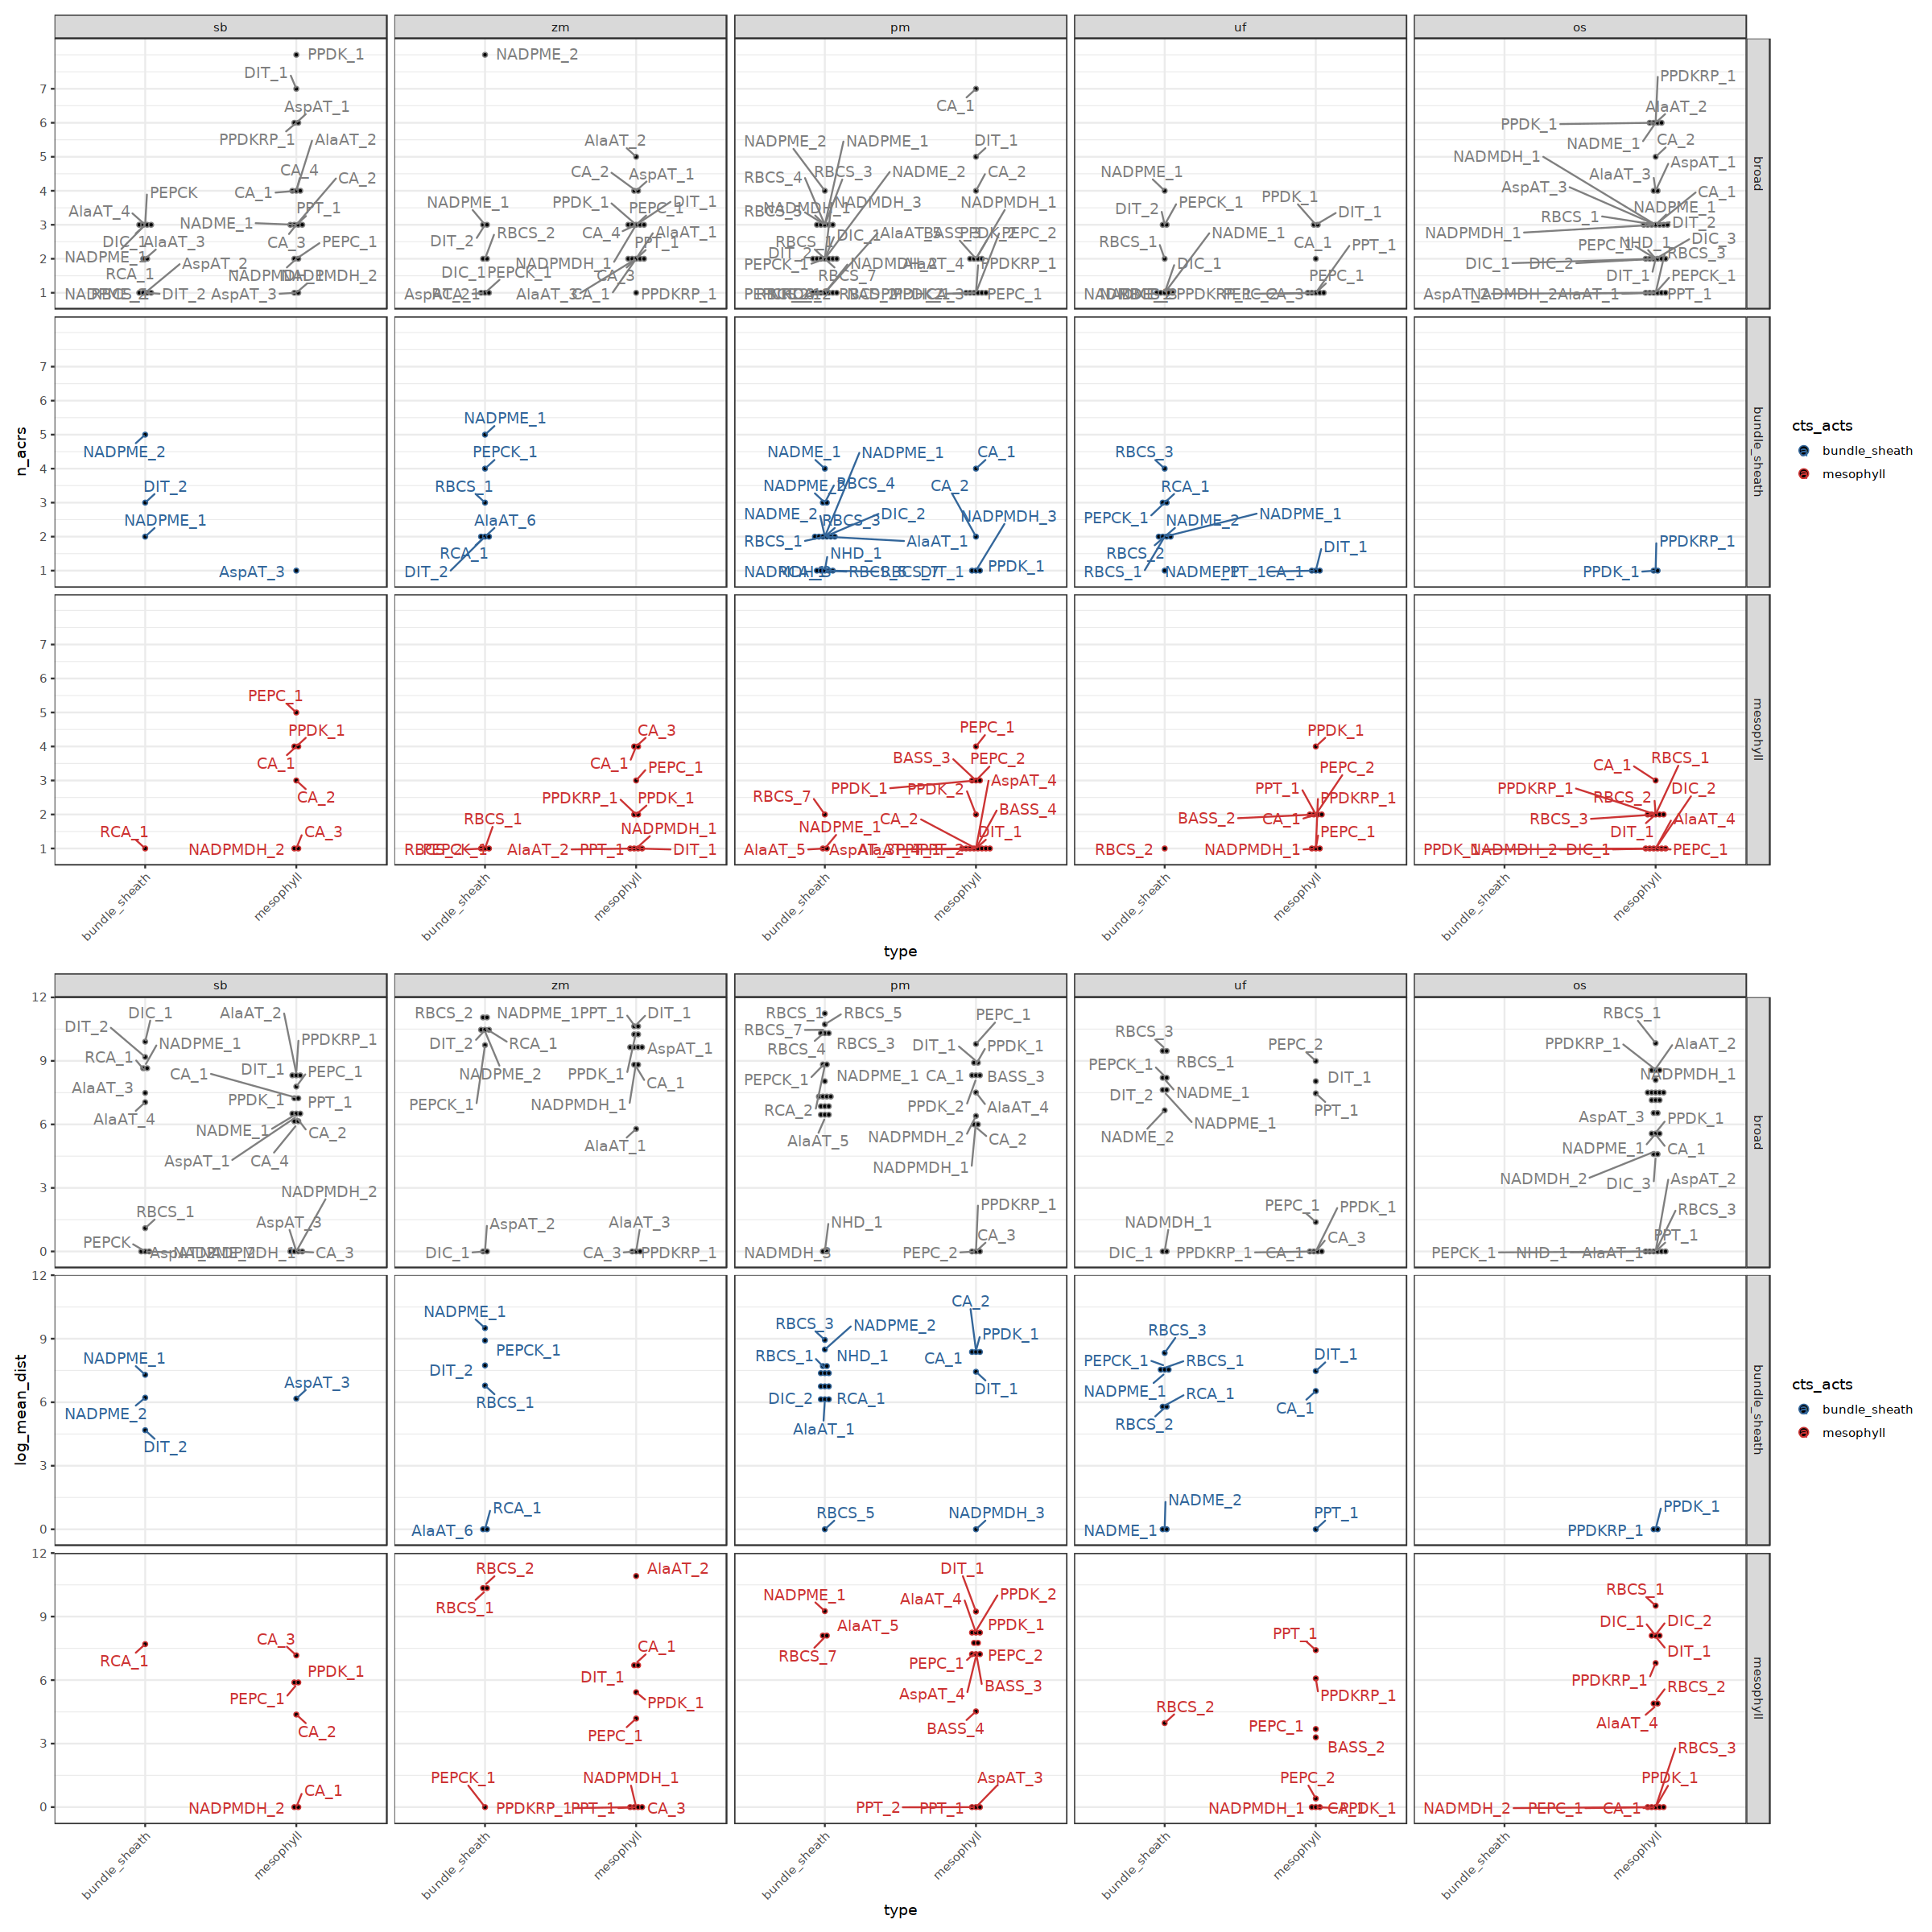

In [18]:
options(repr.plot.width=20, repr.plot.height=20)

combined_number_acrs_dotplots <- n_acrs_dotplot/distance_dotplot
combined_number_acrs_dotplots

In [19]:
write_tsv(log_trans, file = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/tables/All_species.combined_intersection.distance.tsv")

In [76]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_4/number_distance_distal_ACRs.BS_MS.single_overlap.pdf", 
       plot = combined_number_acrs_dotplots, device = "pdf", width = 20, height = 15)


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics we

In [43]:
# graphing_matrix_c4_genes_remove_introns <- combined_C4_genes_acr_intersections_distance %>% 
#     ungroup() %>% 
#     dplyr::filter(distance > 0) %>% 
#     group_by(species, X5,cts_acts) %>% 
#     summarise(n_acrs = n(),
#              mean_distance = median(distance, na.rm = TRUE))


# graphing_matrix_c4_genes_remove_introns$species <- factor(graphing_matrix_c4_genes_remove_introns$species, levels = c("sb", "zm", "pm", "uf", "os"))
# removing_introns <- ggplot(graphing_matrix_c4_genes_remove_introns, aes(y = mean_distance, x = n_acrs, color = cts_acts, label = X5)) +
#     geom_point() +  
#     geom_text_repel() + 
#     facet_grid(species ~ ., scales = "free") + 
#     scale_x_continuous(breaks = unique(graphing_matrix_c4_genes$n_acrs))

`summarise()` has grouped output by 'species', 'X5'. You can override using the
`.groups` argument.


Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 49 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


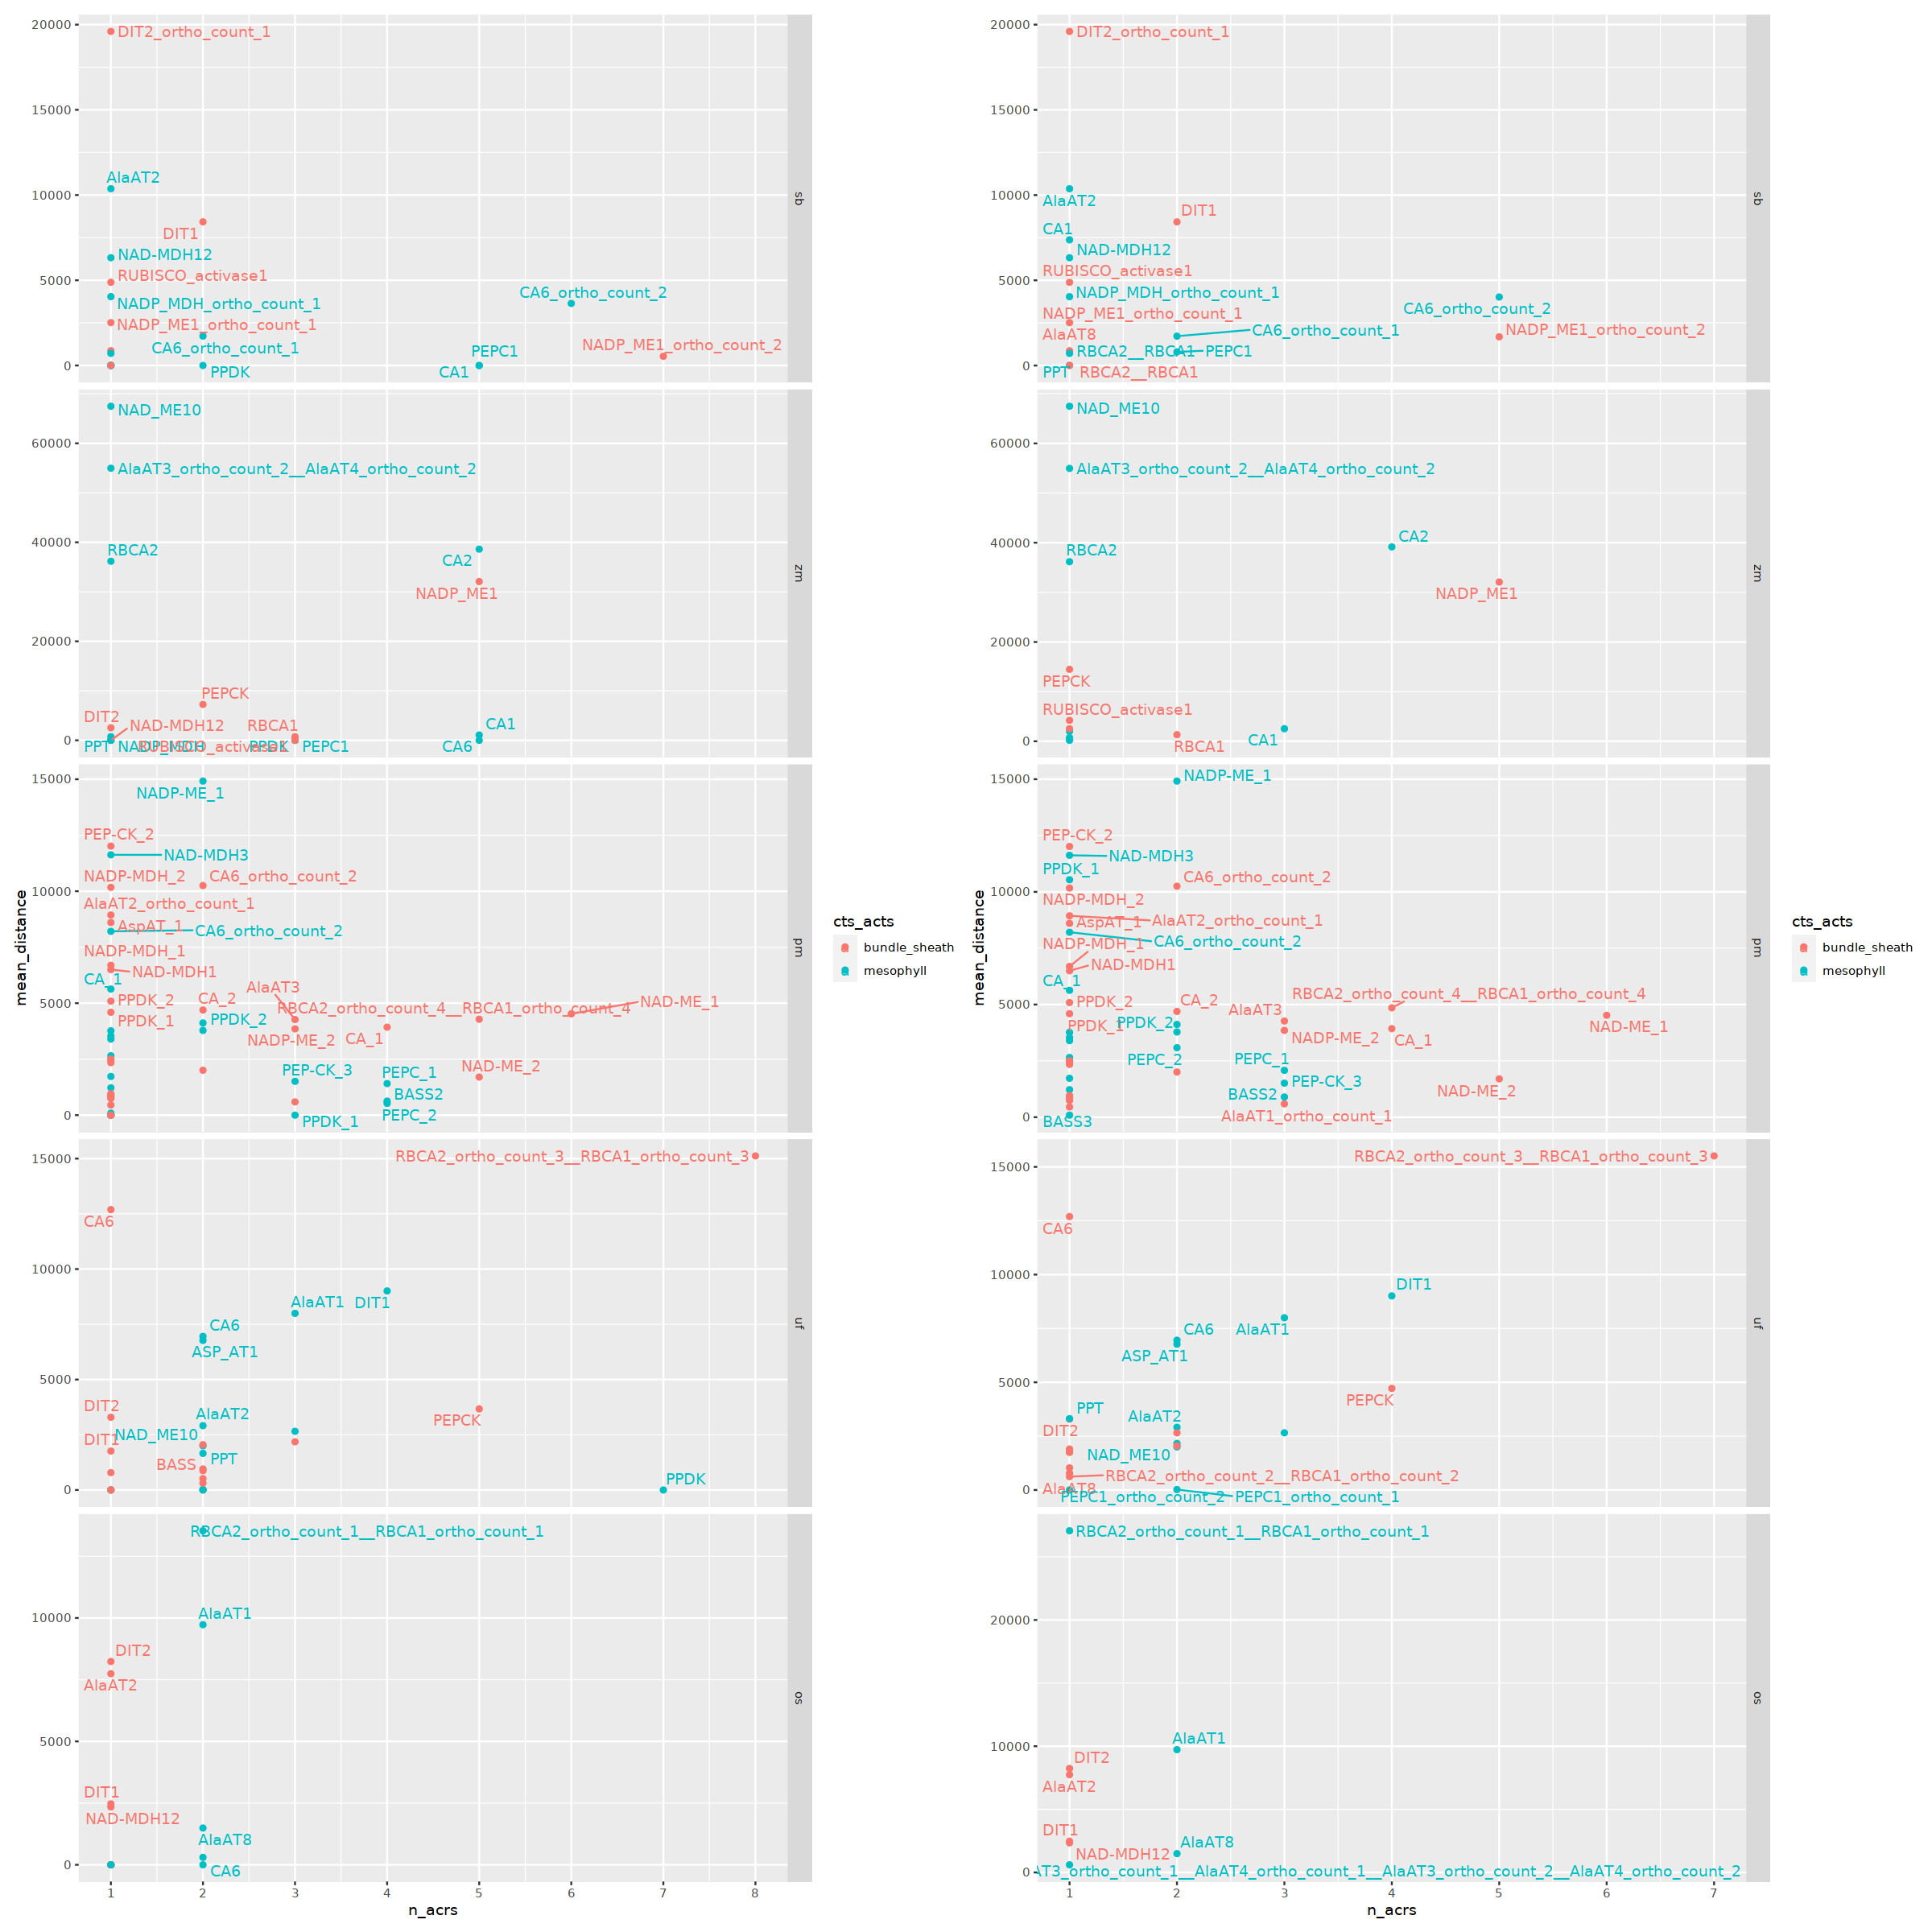

In [46]:
# library(patchwork)
# options(repr.plot.width=20, repr.plot.height=20)
# all_acrs_close + removing_introns

# OLD ANALYSIS - NOT USED

In [5]:
# process_data <- function(input_file, value_threshold = 0.9) {
  
#   # Read the data
#   output <- read_csv(input_file, col_names = c("id", "Peak1", "Peak2", "value"), 
#                    skip = 1) %>% 
#     select(-id) %>% # Remove the first column
#     mutate(generate_name = str_c(Peak1, Peak2, sep = "__")) %>% 
#     separate(Peak1, into = c("chr1", "start1", "end1"), sep = "_") %>% # Separate values for Peak1
#     separate(Peak2, into = c("chr2", "start2", "end2"), sep = "_") %>% 
#     dplyr::mutate(strand1 = ".") %>% 
#     dplyr::mutate(strand2 = ".") %>% 
#     dplyr::filter(value > value_threshold) %>% 
#     dplyr::select(chr1, start1, end1, chr2, start2, end2, generate_name, strand1, strand2, value)

#   return(output)
# }

# filer_cicero_hits <- function(cicero_results, filter_val){
    
#     cicero_results.filtered <- cicero_results %>% 
#         dplyr::filter(value > filter_val)
#     return(cicero_results.filtered)
    
# }

# zm_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/cicero.bundle_sheath.output.csv", 0)
# #os_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/os.cicero.bundle_sheath.output.csv",0)
# #pm_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.cicero.bundle_sheath.output.csv",0)
# sb_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/sb.cicero.bundle_sheath.output.csv",0)
# #uf_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/uf.cicero.bundle_sheath.output.csv",0)

In [178]:
# hist(sb_cicero$value)
# quantile(sb_cicero$value)

# hist(zm_cicero$value)
# quantile(zm_cicero$value)

# sb_cicero.filtered <- filer_cicero_hits(sb_cicero, .02)
# zm_cicero.filtered <- filer_cicero_hits(zm_cicero, .02)

# write_delim(zm_cicero.filtered, 
#             file = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/zm.bs.filtered_cicero.bed",
#             delim = "\t",   col_names =FALSE)
            
            
            

In [8]:
# pm_marker_genes <- read_delim("/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.C4_markers.all.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#         dplyr::select("chrom","start","end","geneID","name","type")
# zm_markers <- read_delim("/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/markers/C4_markers.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#     dplyr::select("chrom","start","end","geneID","name","type")
# sb_marker_genes <- read_delim("/scratch/jpm73279/comparative_single_cell/15.snakemake_marker_ID/02.visualization_annotation/Sb.orthos_from.Zm.markers.tis_leaf.visualize.txt", delim = "\t", col_names = TRUE) %>% 
#         dplyr::select("chr","star","end","geneID","name","type")
# os_marker_genes <- read_delim("/home/jpm73279/genome_downloads/Osativa/v7.0/Rice_markers/Os.leaf_markers_from_haidong.markers_from_pm.visualize.C4_markers_maize.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#         dplyr::select("chrom","start","end","geneID","name","type")
# uf_marker_genes <- read_delim("/scratch/jpm73279/comparative_single_cell/15.snakemake_marker_ID/02.visualization_annotation/Uf.orthos_from.Zm.markers.tis_leaf.visualize.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#     dplyr::select("chrom","start","end","geneID","name","type")


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 62 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chrom, geneID, name, type, X7
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 31 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chrom, geneID, name, type, X7, X8
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6
── Column specification ────────────

In [109]:
Zm.bs_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)
Zm.ms_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [110]:
zm_bs_interactions <- Zm.bs_interactions %>% 
    dplyr::filter(X12 <= 200000)

zm_ms_interactions <- Zm.ms_interactions %>% 
    dplyr::filter(X12 <= 200000)

In [113]:
zm_bs_genes_unique_acr <- zm_bs_interactions %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 

    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "zm")

zm_ms_genes_unique_acr <- zm_ms_interactions %>% 
    dplyr::filter(X6 == "mesophyll") %>% 

    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "zm")

`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [84]:
Zm.bs_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)
Zm.ms_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
head(sb_bs_genes_unique_acr)

X4,X5,X6,ct_acrs,mean_distance,cts_acts,species
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
Sobic.001G073900,NAD-MDH12,bundle_sheath,3,113253.00,bs,sb
Sobic.001G191300,BASS,bundle_sheath,2,135279.00,bs,sb
Sobic.002G141900,NHD1__NHD2,bundle_sheath,2,123277.50,bs,sb
Sobic.002G230100,CA4,mesophyll,2,131015.00,bs,sb
Sobic.002G233700,DIT1,bundle_sheath,9,68223.11,bs,sb
Sobic.002G375800,AlaAT2,mesophyll,2,21119.50,bs,sb


In [85]:
sb_bs_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "sb")

sb_ms_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "mesophyll") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "sb")


Rows: 310 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
Rows: 310 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [104]:
pm_bs_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "pm")

pm_ms_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "mesophyll") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "pm")


Rows: 620 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
Rows: 620 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [105]:
combined_acrs_species <- bind_rows(sb_bs_genes_unique_acr, sb_ms_genes_unique_acr,
         zm_bs_genes_unique_acr, zm_ms_genes_unique_acr,
                                  pm_bs_genes_unique_acr, pm_ms_genes_unique_acr)

In [106]:
glimpse(combined_acrs_species)

Rows: 94
Columns: 7
Groups: X4, X5 [94]
$ X4            <chr> "Sobic.001G073900", "Sobic.001G191300", "Sobic.002G14190…
$ X5            <chr> "NAD-MDH12", "BASS", "NHD1__NHD2", "DIT1", "NADP_ME1_ort…
$ X6            <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath", "bund…
$ ct_acrs       <int> 3, 2, 2, 9, 10, 6, 4, 4, 1, 10, 3, 3, 5, 6, 10, 10, 5, 5…
$ mean_distance <dbl> 113253.00, 135279.00, 123277.50, 68223.11, 8244.30, 8505…
$ cts_acts      <chr> "bs", "bs", "bs", "bs", "bs", "bs", "bs", "bs", "bs", "b…
$ species       <chr> "sb", "sb", "sb", "sb", "sb", "sb", "sb", "sb", "sb", "s…


Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


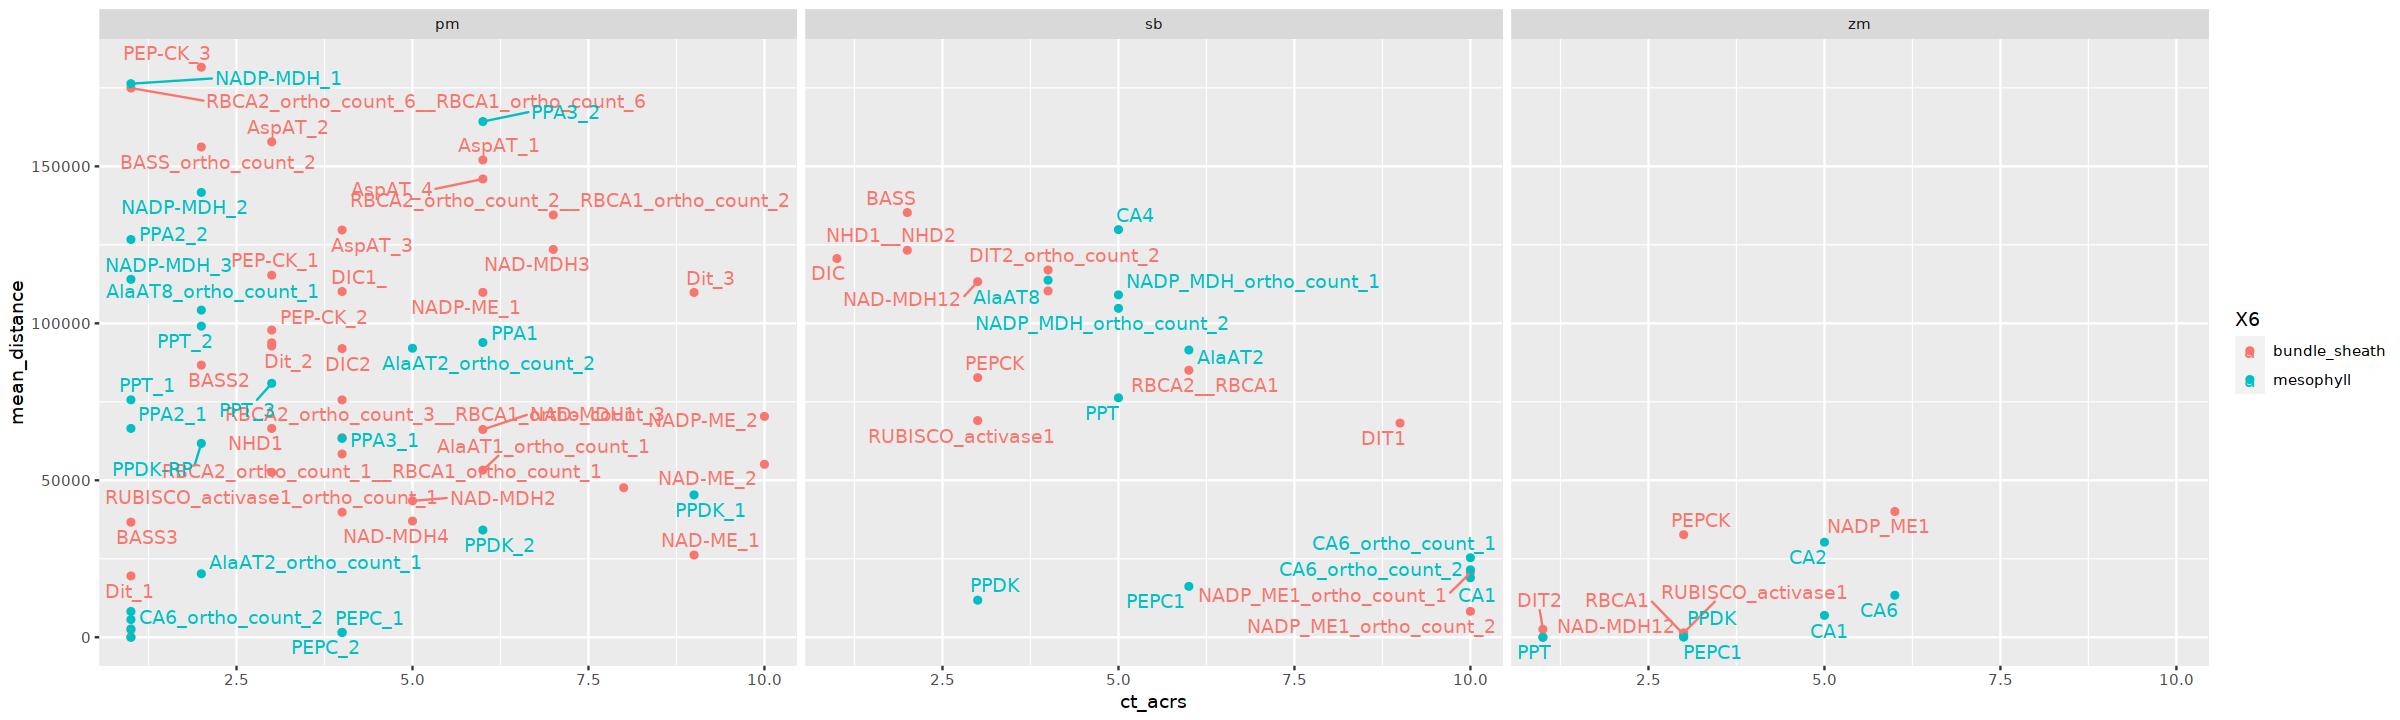

In [108]:
library(ggrepel)
options(ggrepel.max.overlaps = 8)
options(repr.plot.width=20, repr.plot.height=6)
ggplot(combined_acrs_species, aes(x = ct_acrs, y = mean_distance, label = X5, color = X6)) +
  geom_point() + geom_text_repel() + facet_grid(.~species)



In [3]:
# Define a function to read the data and add columns
read_and_annotate <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE) %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

In [120]:
# # Define the files and conditions to be processed
# files_conditions <- list(
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "zm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "pm")
# )

# # Read and annotate each file and store results in a list
# annotated_data_list <- lapply(files_conditions, function(condition) {
#   read_and_annotate(condition$path, condition$cell_type, condition$species)
# })

# # Combine results
# combined_acrs_species <- bind_rows(annotated_data_list)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26180 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (10): X2, X3, X8, X9, X11, X

In [117]:
glimpse(combined_acrs_species)

Rows: 1,930
Columns: 24
$ X1       <chr> "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1…
$ X2       <dbl> 35692130, 35692130, 35692130, 35692130, 35692130, 35692130, 3…
$ X3       <dbl> 35696538, 35696538, 35696538, 35696538, 35696538, 35696538, 3…
$ X4       <chr> "Zm00001eb011080", "Zm00001eb011080", "Zm00001eb011080", "Zm0…
$ X5       <chr> "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK"…
$ X6       <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath", "bundle_sh…
$ X7       <chr> "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1…
$ X8       <dbl> 35691859, 35691859, 35691859, 35691859, 35691859, 35691859, 3…
$ X9       <dbl> 35692360, 35692360, 35692360, 35692360, 35692360, 35692360, 3…
$ X10      <chr> "scACR_1559;bundle_sheath", "scACR_1559;bundle_sheath", "scAC…
$ X11      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X12      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X13      <chr>